In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.initializers import GlorotUniform, HeUniform, HeNormal
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
%pip install tab2img -q # q for quiet
from tab2img.converter import Tab2Img
seed = 314159
np.random.seed(seed)
tf.random.set_seed(seed)

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

from keras.datasets import cifar10, mnist
from keras.optimizers.legacy import SGD, Adam
from keras.utils import to_categorical
from keras.backend import image_data_format
from keras.applications.mobilenet import MobileNet
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Reshape
from keras.layers import Dense, Dropout, BatchNormalization


import matplotlib.pyplot as plt
import numpy as np
import copy

import csv
import random
import time

# Importing necessary libraries for preprocessing and modeling
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout


In [18]:
def sample_data(df, sample_fraction=0.1):
    sampled_df = df.groupby('Label').apply(lambda x: x.sample(frac=sample_fraction)).reset_index(drop=True)
    return sampled_df

In [19]:
df_data_1 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Benign-Monday-no-metadata.parquet'))
df_data_2 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Botnet-Friday-no-metadata.parquet'))
df_data_3 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Bruteforce-Tuesday-no-metadata.parquet'))
df_data_4 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/DDoS-Friday-no-metadata.parquet'))
df_data_5 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/DoS-Wednesday-no-metadata.parquet'))
df_data_6 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Infiltration-Thursday-no-metadata.parquet'))
df_data_7 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Portscan-Friday-no-metadata.parquet'))
df_data_8 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/WebAttacks-Thursday-no-metadata.parquet'))

df_data = pd.concat([df_data_1, df_data_2, df_data_3, df_data_4,
                     df_data_5, df_data_6, df_data_7, df_data_8], axis=0, ignore_index=True)


C:\Users\Mo-gh\AppData\Local\Temp\ipykernel_1308\2738659305.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_df = df.groupby('Label').apply(lambda x: x.sample(frac=sample_fraction)).reset_index(drop=True)
C:\Users\Mo-gh\AppData\Local\Temp\ipykernel_1308\2738659305.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Label').apply(lambda x: x.sample(frac=sample_fraction)).reset_index(drop=True)
C:\Users\Mo-gh\AppData\Local\Temp\ipykernel_1308\2738659305.py:2: FutureWarning: 

In [27]:
# df_data_1 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Benign-Monday-no-metadata.parquet')
# df_data_2 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Botnet-Friday-no-metadata.parquet')
# df_data_3 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Bruteforce-Tuesday-no-metadata.parquet')
# df_data_4 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/DDoS-Friday-no-metadata.parquet')
# df_data_5 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/DoS-Wednesday-no-metadata.parquet')
# df_data_6 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Infiltration-Thursday-no-metadata.parquet')
# df_data_7 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Portscan-Friday-no-metadata.parquet')
# df_data_8 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/WebAttacks-Thursday-no-metadata.parquet')


# df_data = pd.concat([df_data_1, df_data_2, df_data_3, df_data_4,
#                      df_data_5, df_data_6, df_data_7, df_data_8], axis=0, ignore_index=True)


In [20]:
# Find and handle null values
null_counts = df_data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
df_data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = df_data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
df_data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
df_data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",df_data.select_dtypes(include=['object']).columns.tolist(),'\n')

0 null entries have been found in the dataset

1339 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: ['Label'] 



In [21]:
print('Shape of Dataframe: ',df_data.shape,'\n')
print('Inspection of Target Feature - y:\n')
df_data.Label.value_counts()

Shape of Dataframe:  (230043, 78) 

Inspection of Target Feature - y:



Label
Benign                        196393
DoS Hulk                       17285
DDoS                           12801
DoS GoldenEye                   1029
FTP-Patator                      593
DoS slowloris                    538
DoS Slowhttptest                 523
SSH-Patator                      322
PortScan                         196
Web Attack � Brute Force         147
Bot                              144
Web Attack � XSS                  65
Infiltration                       4
Web Attack � Sql Injection         2
Heartbleed                         1
Name: count, dtype: int64

In [22]:
null_counts = df_data.isnull().sum()
df_data.dropna(inplace=True)
duplicate_count = df_data.duplicated().sum()
df_data.drop_duplicates(inplace=True)
df_data.reset_index(drop=True, inplace=True)
X = df_data.copy()
X = df_data.drop('Label', axis=1)
y = df_data['Label']
y = y.astype(str)
y = y.replace({
    'Benign': 0,
    'DoS Hulk': 2,
    'PortScan': 4,
    'DDoS': 2,
    'DoS GoldenEye': 2,
    'DoS slowloris': 2,
    'DoS Slowhttptest': 2,
    'Bot': 1,
    'Infiltration': 3,
    'Heartbleed': 2,
    'FTP-Patator': 5,
    'SSH-Patator': 5,
    'Web Attack � Brute Force': 6,  # Adjusted class name
    'Web Attack � XSS': 6,          # Adjusted class name
    'Web Attack � Sql Injection': 6  # Adjusted class name
})

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
y = pd.Series(y)
class_counts = y.value_counts()
class_ratios = class_counts / len(y)

# y = to_categorical(y)

C:\Users\Mo-gh\AppData\Local\Temp\ipykernel_1308\3261329185.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({


In [23]:
# Set seed
seed_pi = 314159

# Set numpy seed
np.random.seed(seed_pi)
# Set the seed for TensorFlow
tf.random.set_seed(seed_pi)

In [25]:
def extractAllSets(X,y,p_train,p_val,p_test,random_state=seed_pi,shuffle=True):
    ''''
    Splits a given pandas dataframe X (features) into three subsets:X_train, X_val and X_test.
    Also splits a given pandas series y (target) to y_train, y_val and y_test respectively.
    Fractional ratios are provided by the user, as percentages, namely: p_train, p_valid, p_test.
    These inputs describe the percentage of the extracted sets in reference with the inputs X and y.
    The final sets are extracted by executing method train_test_split() twice.

    Parameters
    ----------
    X: pandas Dataframe
    y: pandas Series
    p_train, p_val, p_test  : float
    random_state : integer
    shuffle: (boolean) Enables shuffling the dataset

    The values should be expressed as float fractions and  should  sum to 1.0.
    The parameter of random_state ensures reproducibility.

    Returns
    -------
    X_train, X_val, X_test :
        Dataframes (features) containing the three splits.
    y_train, y_val, y_test  :
        Series (targets) containig the three splits
    '''
    # The initial train-test split produces X_train and y_train
    # Two additional sets are created X_temp and y_temp, that will produce the rest of the sets
    X_train, X_temp, y_train, y_temp = train_test_split(X,y, stratify=y,
        test_size=(1.0 - p_train), random_state=random_state, shuffle=shuffle)
                                                                        # Enable/desable shuffling
    # Note that by applying the stratify condition we ensure homogeneous distribution
    # of chareacteristics in targets

    # Parameter fraction describes the relevant size of the test size
    fraction = p_test / (p_val + p_test)
    X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,stratify=y_temp,
        test_size=fraction, random_state=random_state, shuffle=shuffle) # Enable/desable shuffling
    # Note that we use the same random_state twice for reproducibility

    return X_train, X_val, X_test, y_train, y_val, y_test

In [28]:
X_train, X_val, X_test, y_train, y_val, y_test = extractAllSets(X, y, 0.55, 0.1, 0.35)

# Organize all sets in list format
original_data = [X_train, X_val, X_test, y_train, y_val, y_test]

In [11]:
# # Sampling strategy '0.5' corresponds to binary classification
# smote = SMOTE(sampling_strategy = 0.5, random_state=seed_pi)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [29]:
# Initialize QuantileTransformer with uniform distribution
quantile_transformer = QuantileTransformer(n_quantiles=10**4, output_distribution='uniform')

# Fit and transform the training data
X_train_transformed = quantile_transformer.fit_transform(X_train)

# Transform the validation and test data using the same transformer
X_val_transformed  = quantile_transformer.transform(X_val)
X_test_transformed = quantile_transformer.transform(X_test)

# Arrange transformed data as a list
scaled_data = [X_train_transformed, X_val_transformed, X_test_transformed, y_train, y_val, y_test]

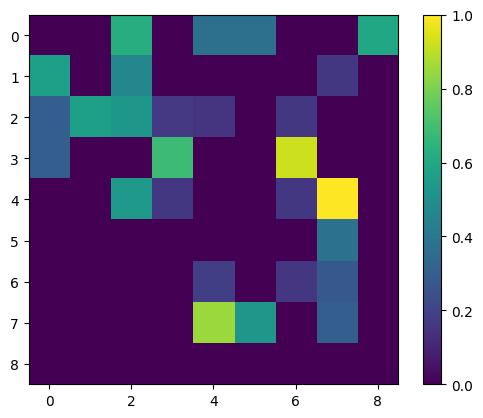

In [30]:
# Define the Tab2Img model
model_tab2img = Tab2Img()

""" In this stage, every sample in the data becomes a (9x9) numpy array. """
# Convert training data
X_train_images = model_tab2img.fit_transform(X_train_transformed, y_train.values)

# Convert validation and test data (using the fitted model)
X_val_images  = model_tab2img.transform(X_val_transformed)
X_test_images = model_tab2img.transform(X_test_transformed)

""" In this stage, every array in the data becomes a (9x9x1) greyscale image. """
# Greyscale Transformation - Reshape the image data for CNN input
X_train_images = X_train_images.reshape(-1, 9, 9, 1)
X_val_images   = X_val_images.reshape(  -1, 9, 9, 1)
X_test_images  = X_test_images.reshape( -1, 9, 9, 1)

# Visualize an example
plt.imshow(X_train_images[0])
plt.colorbar()
plt.show()

In [31]:
import numpy as np
X_train_images = np.array(X_train_images)
X_val_images = np.array(X_val_images)
X_test_images = np.array(X_test_images)
Y_train = np.array(y_train)
Y_val = np.array(y_val)
Y_test_test = np.array(y_test)

In [32]:
X_train_images.shape, Y_train.shape, X_val_images.shape, Y_val.shape, X_test_images.shape, Y_test_test.shape

((126523, 9, 9, 1),
 (126523,),
 (23004, 9, 9, 1),
 (23004,),
 (80516, 9, 9, 1),
 (80516,))

In [33]:
import random
import numpy as np
import numpy.linalg as lina
from scipy.optimize import linprog
import cvxopt as opt

def subsets_Size_NElem(s, nElems):
    res = []
    for i in range(1 << s):
        bin_string = list(format(i, '0'+str(s)+'b'))
        vec = [float(x) for x in bin_string]
        if (sum(vec) == nElems):
            res.append(vec)
    return res

def multLL(lista, listb):
    return [a*b for a,b in zip(lista,listb)]

def create_lhs_eqCol(nClass, nVars, nDev, vecVars):
    res = []
    for i in range(0, nClass):
        constrCol = [0.0]*nVars
        for j in range(0, nDev):
            pos = i + j*nClass
            constrCol[pos] = 1.0
        restrictedCol = multLL(constrCol, vecVars)
        res.append(restrictedCol)
    return res

def create_lhs_eqCol_weights(nClass, nVars, nDev, vecVars, vecWeights):
    res = []
    for i in range(0, nClass):
        constrCol = [0.0]*nVars
        for j in range(0, nDev):
            pos = i + j*nClass
            constrCol[pos] = vecWeights[j]
        restrictedCol = multLL(constrCol, vecVars)
        res.append(restrictedCol)
    return res

def create_lhs_eqRow(nClass, nVars, nDev, vecVars):
    res = []
    for i in range(0, nDev):
        constrRow = [0.0]*nVars
        for j in range(0, nClass):
            pos = i*nClass + j
            constrRow[pos] = 1.0
        restrictedRow = multLL(constrRow, vecVars)
        res.append(restrictedRow)
    return res

def matrMN(m, n):
    mt = np.zeros((m, n))
    for i in range(0, m):
        mt[i][i] = -1.0
    return mt

def sumColsGetCol(mt):
    return map(sum, mt)

def sumRowsGetRow(mt):
    return sumColsGetCol(np.transpose(mt))

def printMat(mt):
    for i in range(0, len(mt)):
        printRow(mt[i])

def printRow(rw):
    print("[", end='')
    for i in range(0, len(rw)):
        print(rw[i], ' ', end='')
    print("]")

def makeEquationsForZeros(lwZeros):
    return list(map(lambda pos: [0]*(pos) + [1] + [0]*(len(lwZeros)-pos-1), np.where(lwZeros == 0)[0]))

def create_solution_weights(numInstancesClass, classesPerDevice, nCopies, vecWeights=[]):
    totalNRecords = sum(numInstancesClass)
    nClass = len(numInstancesClass)
    oneSetofDevices = subsets_Size_NElem(nClass, classesPerDevice)
    lol = oneSetofDevices * nCopies
    nDev = nCopies * len(oneSetofDevices)
    nVars = nClass * nDev

    sumCols = list(map(lambda x: x*1/totalNRecords, numInstancesClass))

    vecVars = list(np.array(lol).flat)
    if vecWeights == []:
        vecWeights = [1/nDev]*nDev

    lhs_eqCol = create_lhs_eqCol_weights(nClass, nVars, nDev, vecVars, vecWeights)
    rhs_eqCol = sumCols

    lhs_eqRow = create_lhs_eqRow(nClass, nVars, nDev, vecVars)
    rhs_eqRow = [1.0]*nDev

    lhs_probZero = makeEquationsForZeros(np.array(vecVars))
    rhs_probZero = [0]*len(lhs_probZero)
    neq_probZero = len(rhs_probZero)

    lp_lhs_eq = lhs_probZero + lhs_eqCol + lhs_eqRow
    lp_rhs_eq = rhs_probZero + rhs_eqCol + rhs_eqRow
    nConstraints = neq_probZero + nDev + nClass
    rankAllMat = lina.matrix_rank(lp_lhs_eq)
    newRank = lina.matrix_rank(lp_lhs_eq[0:len(lp_lhs_eq)-1])

    if (len(lp_lhs_eq) != rankAllMat) and (newRank == (len(lp_lhs_eq)-1)):
        lp_lhs_eq = lp_lhs_eq[0:len(lp_lhs_eq)-1]
        lp_rhs_eq = lp_rhs_eq[0:len(lp_rhs_eq)-1]
        nConstraints = nConstraints - 1

    mA = opt.matrix(np.array(lp_lhs_eq))
    mb = opt.matrix(lp_rhs_eq, (nConstraints, 1))

    mQ = opt.matrix(np.identity(nVars))
    alphaRandomVector = np.random.uniform(0, 1, nVars)
    mL = opt.matrix(-1*2*alphaRandomVector, (nVars, 1))

    mG = opt.matrix((np.identity(nVars))*-1)
    mh = opt.matrix([0.0]*nVars, (nVars, 1))

    sol = opt.solvers.qp(mQ, mL, G=mG, h=mh, A=mA, b=mb)
    vPDev = multLL(sol['x'], vecVars)
    mtPDev = np.array(vPDev).reshape((nDev, nClass))
    mtPDev = np.clip(mtPDev, 0, None)
    mtNRecDev = list(map(lambda l, e: list(map(lambda el: el*e*totalNRecords, l)), mtPDev, vecWeights))
    return mtNRecDev

def create_assignment(y, mtDevClas2Records):
    nDev = len(mtDevClas2Records)
    record2Dev = [0]*len(y)
    for classPos in range(0, len(set(y))):
        className = list(set(y))[classPos]
        vDev2Records = list(map(lambda x: x[classPos], mtDevClas2Records))
        # Handle the case where no records are assigned to any device for a class
        if sum(vDev2Records) == 0:
            vDev2Probs = [1/nDev] * nDev  # Distribute records evenly across devices
        else:
            vDev2Probs = list(map(lambda x: x/sum(vDev2Records), vDev2Records))
        recordsInClass = np.where(y == className)[0]
        vDevices = np.random.choice(range(1, nDev + 1), size=len(recordsInClass), replace=True, p=vDev2Probs)
        for i in range(0, len(recordsInClass)):
            indexRecord = recordsInClass[i]
            device = vDevices[i]
            record2Dev[indexRecord] = device
    return record2Dev


In [34]:
from keras.layers import Dense, GRU, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from tensorflow.keras.regularizers import l2

input_shape = (9,9,1)
class CustomModel:
    def __init__(self, loss, optimizer, num_classes):
        self.loss = loss
        self.optimizer = optimizer
        self.num_classes = num_classes

    def fl_paper_model(self,train_shape):

          conv_initializer   = HeNormal(seed=seed_pi)
          dense_initializer  = HeUniform(seed=seed_pi)
          output_initializer = GlorotUniform(seed=seed_pi)

          mlp = Sequential([
          Input(shape=(9, 9, 1)),
          Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=conv_initializer),
          MaxPooling2D(pool_size=(2, 2)),
          Flatten(),
          Dense(128, activation = 'relu', kernel_initializer = dense_initializer),
          BatchNormalization(),
          Dense(7, activation = 'sigmoid', kernel_initializer = output_initializer)
          ])

          mlp.compile(loss=self.loss, optimizer=self.optimizer, metrics=['accuracy'])
          return mlp

In [17]:
# Global configuration
from tensorflow.keras.optimizers import Adam, SGD

NUMOFCLIENTS = 10 # number of clients (particles)
EPOCHS = 30  # number of total iterations
CLIENT_EPOCHS = 5  # number of each client's iterations
BATCH_SIZE = 256 # Size of batches to train on
ACC = 0.3
LOCAL_ACC = 0.7
GLOBAL_ACC = 1.4
DROP_RATE = 0
# Model configuration
# LOSS = 'binary_crossentropy'
LOSS = 'sparse_categorical_crossentropy'
NUMOFCLASSES = 7
lr = 0.00001
# lr = 0.001
OPTIMIZER = Adam(learning_rate=lr)
# OPTIMIZER = SGD(learning_rate=lr, momentum=0.9, nesterov=False)

# Function to write results to CSV
def write_csv(algorithm_name, list):
    file_name = '{name}_10Clients_{drop}%_output_LR_{lr}_CLI_{cli}_CLI_EPOCHS_{cli_epoch}_TOTAL_EPOCHS_{epochs}_BATCH_{batch}.csv'
    file_name = file_name.format(drop=DROP_RATE, name=algorithm_name, lr=lr, cli=NUMOFCLIENTS, cli_epoch=CLIENT_EPOCHS, epochs=EPOCHS, batch=BATCH_SIZE)
    f = open(file_name, 'w', encoding='utf-8', newline='')
    wr = csv.writer(f)

    for l in list:
        wr.writerow(l)
    f.close()

def init_model(train_data_shape):
    model = CustomModel(loss=LOSS, optimizer=OPTIMIZER,num_classes=NUMOFCLASSES)
    init_model = model.fl_paper_model(train_shape=train_data_shape)

    return init_model

def client_data_config(X_train_images, Y_train, num_clients):

    # Parameters
    num_clients = 10
    classes_per_device = 2  # Adjust based on your dataset's characteristics
    nCopies = 2

    # Calculate the number of instances per class
    numInstancesClass = list(map(lambda e: np.count_nonzero(y == e), set(Y_train)))

    # Generate the solution weights
    mtDevClas2Records = create_solution_weights(numInstancesClass, classes_per_device, nCopies)

    # Assign the records to clients, ensuring device numbers are within the valid range
    rec2dev = create_assignment(Y_train, mtDevClas2Records)
    rec2dev = [i % num_clients + 1 for i in rec2dev]  # Map device numbers to the range [1, num_clients]

    # Split the data based on device assignments
    client_data = {i: {'X_train_images': [], 'Y_train': []} for i in range(1, num_clients + 1)}
    for idx, device in enumerate(rec2dev):
        # Use .iloc with the index to access rows of X_train
        client_data[device]['X_train_images'].append(X_train_images[idx])
        client_data[device]['Y_train'].append(Y_train[idx])
    # Convert lists to numpy arrays
    for device in client_data:
        client_data[device]['X_train_images'] = np.array(client_data[device]['X_train_images'])
        client_data[device]['Y_train'] = np.array(client_data[device]['Y_train'])

    # client_data now contains the non-i.i.d. distributed data for each client

    for device, data in client_data.items():
        unique, counts = np.unique(data['Y_train'], return_counts=True)
        print(f"Client {device}:")
        print(dict(zip(unique, counts)))


    return client_data

class particle():
    def __init__(self, particle_num, client, x_train, y_train):
        # for check particle id
        self.particle_id = particle_num

        # particle model init
        self.particle_model = client

        # best model init
        self.local_best_model = client
        self.global_best_model = client

        # best score init
        self.local_best_score = 0.0
        self.global_best_score = 0.0

        self.x = x_train
        self.y = y_train

        # acc = acceleration
        self.parm = {'acc':ACC, 'local_acc':LOCAL_ACC, 'global_acc':GLOBAL_ACC}

        # velocities init
        self.velocities = [None] * len(client.get_weights())
        for i, layer in enumerate(client.get_weights()):
            self.velocities[i] = np.random.rand(*layer.shape) / 5 - 0.10

    def train_particle(self):
        print("particle {}/{} fitting".format(self.particle_id+1, NUMOFCLIENTS))

        # set each epoch's weight
        step_model = self.particle_model
        step_weight = step_model.get_weights()

        # new_velocities = [None] * len(step_weight)
        new_weight = [None] * len(step_weight)
        local_rand, global_rand = random.random(), random.random()

        # PSO algorithm applied to weights
        for index, layer in enumerate(step_weight):
            new_v = self.parm['acc'] * self.velocities[index]
            new_v = new_v + self.parm['local_acc'] * local_rand * (self.local_best_model.get_weights()[index] - layer)
            new_v = new_v + self.parm['global_acc'] * global_rand * (self.global_best_model.get_weights()[index] - layer)
            self.velocities[index] = new_v
            new_weight[index] = step_weight[index] + self.velocities[index]

        optimizer = Adam(learning_rate=lr)
        step_model.compile(optimizer=optimizer, loss=LOSS, metrics=['accuracy'])

        step_model.set_weights(new_weight)

        # Recreate the optimizer to avoid the error

        # 4.2 - Early Stopping, Learning Rate Scheduler and Compiling
        # save_model_path = 'checkpoint/checkpoint_particle_{}.weights.h5'.format(self.particle_id)
        save_model_path = 'checkpoint_1/checkpoint_particle_{}.weights.h5'.format(self.particle_id)

        mc = ModelCheckpoint(filepath=save_model_path,
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            save_weights_only=True)

        early_stopping = EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            verbose=1,
            restore_best_weights=True)

        reduce_lr = ReduceLROnPlateau(
            monitor='val_accuracy',
            patience=5,
            min_lr=1e-07,
            verbose=1,
            factor=0.1)

        hist = step_model.fit(x=self.x, y=self.y,
                              epochs=CLIENT_EPOCHS,
                              batch_size=BATCH_SIZE,
                              verbose=1,
                              validation_split=0.1,
                              callbacks=[mc])

        train_score_loss = hist.history['val_loss'][-1]

        step_model.load_weights(save_model_path)
        self.particle_model = step_model

        if self.global_best_score >= train_score_loss:
            self.local_best_model = step_model

        return self.particle_id, train_score_loss

    def update_global_model(self, global_best_model, global_best_score):
        if self.local_best_score < global_best_score:
            self.global_best_model = global_best_model
            self.global_best_score = global_best_score

    def resp_best_model(self, gid):
        if self.particle_id == gid:
            return self.particle_model


def get_best_score_by_loss(step_result):
    # step_result = [[step_model, train_socre_acc],...]
    temp_score = 100000
    temp_index = 0

    for index, result in enumerate(step_result):
        if temp_score > result[1]:
            temp_score = result[1]
            temp_index = index

    return step_result[temp_index][0], step_result[temp_index][1]


def get_best_score_by_acc(step_result):
    # step_result = [[step_model, train_socre_acc],...]
    temp_score = 0
    temp_index = 0

    for index, result in enumerate(step_result):
        if temp_score < result[1]:
            temp_score = result[1]
            temp_index = index

    return step_result[temp_index][0], step_result[temp_index][1]

if __name__ == "__main__":

    x_train = X_train_images
    y_train = Y_train
    x_test = X_test_images
    y_test = Y_test_test


    train_data_shape = (x_train[0].shape[1],)
    print("Shape of a single data point:", train_data_shape)
    client_data = client_data_config(x_train, y_train, NUMOFCLIENTS)

    server_model = init_model(train_data_shape=train_data_shape)
    # print(server_model.summary())


    pso_model = []
    for i in range(NUMOFCLIENTS):
        # pso_model.append(particle(particle_num=i, client=init_model(train_data_shape = x_train[0].shape[1]), x_train=client_data[i][0], y_train=client_data[i][1]))
        pso_model.append(particle(particle_num=i, client=init_model(train_data_shape = x_train[0].shape[1]), x_train=client_data[i+1]['X_train_images'], y_train=client_data[i+1]['Y_train']))

    server_evaluate_acc = []
    global_best_model = None
    global_best_score = 0.0

    for epoch in range(EPOCHS):
        server_result = []
        start = time.time()

        for client in pso_model:
            if epoch != 0:
                client.update_global_model(server_model, global_best_score)

            pid, train_score = client.train_particle()
            rand = random.randint(0, 99)

            drop_communication = range(DROP_RATE)
            if rand not in drop_communication:
                server_result.append([pid, train_score])

        gid, global_best_score = get_best_score_by_loss(server_result)
        for client in pso_model:
            if client.resp_best_model(gid) != None:
                global_best_model = client.resp_best_model(gid)

        server_model = global_best_model

        print("server {}/{} evaluate".format(epoch + 1, EPOCHS))
        server_evaluate_acc.append(server_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1))

    write_csv("FedPSO_TORA_CICIDS", server_evaluate_acc)

'''Confusion Matrix FedPSO_TORA_CICIDS:
[[121545      0    208      0      0      0      0]
 [    90      0      0      0      0      0      0]
 [   214      0  19897      0      0      0      0]
 [     2      0      0      0      0      0      0]
 [   114      0      8      0      0      0      0]
 [   571      0      1      0      0      0      0]
 [   134      0      0      0      0      0      0]]'''


Shape of a single data point: (9,)
     pcost       dcost       gap    pres   dres
 0:  3.4506e+01  2.8905e+01  4e+03  6e+01  4e+00
 1:  3.8247e+01  3.3021e+02  3e+03  4e+01  2e+00
 2:  3.6628e+01  3.2957e+03  3e+03  4e+01  2e+00
 3:  3.6906e+01  7.5974e+04  3e+03  3e+01  2e+00
 4:  3.6993e+01  1.2180e+07  1e+04  3e+01  2e+00
 5:  3.7007e+01  1.8161e+10  2e+05  3e+01  2e+00
 6:  3.7354e+01  9.4779e+16  2e+16  3e+01  2e+00
 7:  8.5919e+01  3.2927e+17  9e+15  3e+01  2e+00
 8:  9.8207e+01  3.2927e+17  9e+15  3e+01  2e+00
Terminated (singular KKT matrix).
Client 1:
{0: 49376, 2: 10386}
Client 2:
{0: 49452, 1: 75, 2: 13072, 3: 1, 5: 209}
Client 3:
{0: 38870, 1: 35, 3: 1, 4: 70, 5: 174}
Client 4:
{1: 12, 4: 163, 5: 463, 6: 3}
Client 5:
{1: 40, 5: 126, 6: 188}
Client 6:
{1: 57, 2: 2958, 5: 373, 6: 157}
Client 7:
{0: 25711, 1: 14, 2: 1410, 3: 1}
Client 8:
{0: 51262, 2: 7910, 3: 2, 4: 85}
Client 9:
{0: 50458, 2: 15919, 3: 1, 5: 142}
Client 10:
{0: 51426, 2: 634}
particle 1/10 fitting
Epoch 1/5


4462/4462 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step
Confusion Matrix:
[[121545      0    208      0      0      0      0]
 [    90      0      0      0      0      0      0]
 [   214      0  19897      0      0      0      0]
 [     2      0      0      0      0      0      0]
 [   114      0      8      0      0      0      0]
 [   571      0      1      0      0      0      0]
 [   134      0      0      0      0      0      0]]


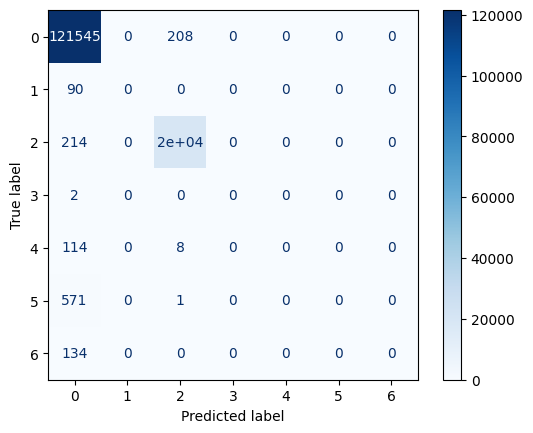

In [18]:
# Predict on the test set
# 
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(server_model.predict(x_test), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(NUMOFCLASSES))

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(NUMOFCLASSES)])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Overall Precision: ~0.9795
# Overall Recall: ~0.9811
# Overall F1-Score: ~0.9802

Shape of a single data point: (9,)
     pcost       dcost       gap    pres   dres
 0:  4.3827e+01  4.0125e+01  4e+03  6e+01  4e+00
 1:  4.7382e+01  3.4534e+02  3e+03  4e+01  2e+00
 2:  4.6040e+01  3.4709e+03  3e+03  4e+01  2e+00
 3:  4.6200e+01  8.5323e+04  3e+03  3e+01  2e+00
 4:  4.6265e+01  1.6849e+07  1e+04  3e+01  2e+00
 5:  4.6274e+01  3.2305e+10  3e+05  3e+01  2e+00
 6:  5.7416e+01  1.1618e+17  3e+16  3e+01  2e+00
 7:  1.3425e+02  2.8991e+17  7e+16  2e+01  2e+00
 8:  1.3536e+02  2.8991e+17  7e+16  2e+01  2e+00
Terminated (singular KKT matrix).
Client 1:
{0: 8473, 2: 2315, 6: 6}
Client 2:
{0: 11748, 5: 276, 6: 13}
Client 3:
{0: 46048, 1: 53, 4: 64, 5: 157, 6: 15}
Client 4:
{1: 20, 4: 6, 5: 70, 6: 12}
Client 5:
{3: 1, 6: 15}
Client 6:
{1: 6, 2: 3701, 3: 1, 6: 13}
Client 7:
{0: 6932, 2: 1623, 4: 27, 6: 12}
Client 8:
{0: 10512, 2: 2659, 4: 11, 6: 15}
Client 9:
{0: 13306, 2: 3763, 6: 6}
Client 10:
{0: 10997, 2: 3636, 6: 11}
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
client 1/10 fitt

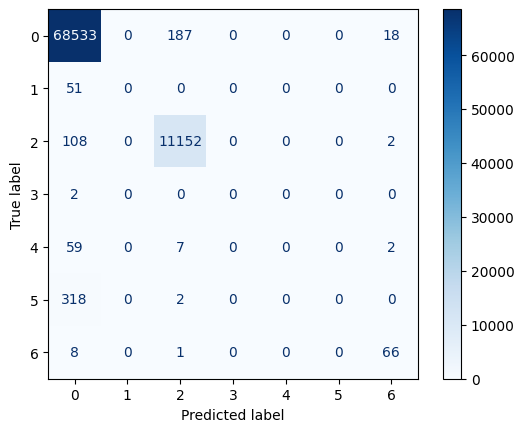

In [35]:
# Global configuration
from tensorflow.keras.optimizers import Adam, SGD

NUMOFCLIENTS = 10 # number of clients (particles)
EPOCHS = 30  # number of total iterations
CLIENT_EPOCHS = 5  # number of each client's iterations
BATCH_SIZE = 256 # Size of batches to train on
ACC = 0.3
LOCAL_ACC = 0.7
GLOBAL_ACC = 1.4
DROP_RATE = 0
SELECT_CLIENTS = 1
# Model configuration
# LOSS = 'binary_crossentropy'
LOSS = 'sparse_categorical_crossentropy'
NUMOFCLASSES = 7
lr = 0.00001
# lr = 0.001
OPTIMIZER = Adam(learning_rate=lr)
# OPTIMIZER = SGD(learning_rate=lr, momentum=0.9, nesterov=False)

# Function to write results to CSV
def write_csv(algorithm_name, list):
    file_name = '{name}_10Clients_{drop}%_output_LR_{lr}_CLI_{cli}_CLI_EPOCHS_{cli_epoch}_TOTAL_EPOCHS_{epochs}_BATCH_{batch}.csv'
    file_name = file_name.format(drop=DROP_RATE, name=algorithm_name, lr=lr, cli=NUMOFCLIENTS, cli_epoch=CLIENT_EPOCHS, epochs=EPOCHS, batch=BATCH_SIZE)
    f = open(file_name, 'w', encoding='utf-8', newline='')
    wr = csv.writer(f)

    for l in list:
        wr.writerow(l)
    f.close()

def init_model(train_data_shape):
    model = CustomModel(loss=LOSS, optimizer=OPTIMIZER,num_classes=NUMOFCLASSES)
    init_model = model.fl_paper_model(train_shape=train_data_shape)

    return init_model

def client_data_config(X_train_images, Y_train, num_clients):

    # Parameters
    num_clients = 10
    classes_per_device = 2  # Adjust based on your dataset's characteristics
    nCopies = 2

    # Calculate the number of instances per class
    numInstancesClass = list(map(lambda e: np.count_nonzero(y == e), set(Y_train)))

    # Generate the solution weights
    mtDevClas2Records = create_solution_weights(numInstancesClass, classes_per_device, nCopies)

    # Assign the records to clients, ensuring device numbers are within the valid range
    rec2dev = create_assignment(Y_train, mtDevClas2Records)
    rec2dev = [i % num_clients + 1 for i in rec2dev]  # Map device numbers to the range [1, num_clients]

    # Split the data based on device assignments
    client_data = {i: {'X_train_images': [], 'Y_train': []} for i in range(1, num_clients + 1)}
    for idx, device in enumerate(rec2dev):
        # Use .iloc with the index to access rows of X_train
        client_data[device]['X_train_images'].append(X_train_images[idx])
        client_data[device]['Y_train'].append(Y_train[idx])
    # Convert lists to numpy arrays
    for device in client_data:
        client_data[device]['X_train_images'] = np.array(client_data[device]['X_train_images'])
        client_data[device]['Y_train'] = np.array(client_data[device]['Y_train'])

    # client_data now contains the non-i.i.d. distributed data for each client

    for device, data in client_data.items():
        unique, counts = np.unique(data['Y_train'], return_counts=True)
        print(f"Client {device}:")
        print(dict(zip(unique, counts)))


    return client_data


def fedAVG(server_weight):
    avg_weight = [np.zeros_like(w) for w in server_weight[0]]  # Initialize with the same structure as the first set of weights

    for client_weights in server_weight:
        for i, w in enumerate(client_weights):
            avg_weight[i] += w

    avg_weight = [w / len(server_weight) for w in avg_weight]  # Compute the average

    return avg_weight

def client_update(index, client, now_epoch, avg_weight):
    print("client {}/{} fitting".format(index + 1, int(NUMOFCLIENTS * SELECT_CLIENTS)))

    optimizer = tf.keras.optimizers.Adam()
    client.compile(optimizer=optimizer, loss=LOSS, metrics=['accuracy'])
    if now_epoch != 0:
        client.set_weights(avg_weight)

    client.fit(client_data[i+1]['X_train_images'],client_data[i+1]['Y_train'],
        epochs=CLIENT_EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_split=0.2,
    )

    return client

if __name__ == "__main__":

    x_train = X_train_images
    y_train = Y_train
    x_test = X_test_images
    y_test = Y_test_test

    train_data_shape = (x_train[0].shape[1],)
    print("Shape of a single data point:", train_data_shape)
    client_data = client_data_config(x_train, y_train, NUMOFCLIENTS)
    print(client_data.keys())
    server_model = init_model(train_data_shape=train_data_shape)
    # print(server_model.summary())

    fl_model = []
    for i in range(NUMOFCLIENTS):  # Keys are now starting from 0
        optimizer = Adam(learning_rate=lr)
        fl_model.append(init_model(train_data_shape=train_data_shape,))

    avg_weight = [np.zeros_like(w) for w in server_model.get_weights()]

    server_evaluate_acc = []

    for epoch in range(EPOCHS):
        server_weight = []

        selected_num = int(max(NUMOFCLIENTS * SELECT_CLIENTS, 1))
        split_data_index = []
        while len(split_data_index) < selected_num:
            item = random.choice(range(len(fl_model)))
            if item not in split_data_index:
                split_data_index.append(item)
        split_data_index.sort()
        selected_model = [fl_model[k] for k in split_data_index]

        for index, client in enumerate(selected_model):
            recv_model = client_update(index, client, epoch, avg_weight)

            rand = random.randint(0, 99)
            drop_communication = range(DROP_RATE)
            if rand not in drop_communication:
                server_weight.append(copy.deepcopy(recv_model.get_weights()))

        avg_weight = fedAVG(server_weight)

        server_model.set_weights(avg_weight)
        print("server {}/{} evaluate".format(epoch + 1, EPOCHS))
        server_evaluate_acc.append(server_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1))

    write_csv("FedAvg_TORA_CICIDS", server_evaluate_acc)

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(server_model.predict(x_test), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(NUMOFCLASSES))

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(NUMOFCLASSES)])
disp.plot(cmap=plt.cm.Blues)
plt.show()

'''Confusion Matrix FedAvg_TORA_CICIDS:
[[68533     0   187     0     0     0    18]
 [   51     0     0     0     0     0     0]
 [  108     0 11152     0     0     0     2]
 [    2     0     0     0     0     0     0]
 [   59     0     7     0     0     0     2]
 [  318     0     2     0     0     0     0]
 [    8     0     1     0     0     0    66]]'''

Shape of a single data point: (9,)
Client 0:
  Number of samples: 12653
  Class distribution: {0: 10801, 1: 6, 2: 1763, 4: 16, 5: 51, 6: 16}

Client 1:
  Number of samples: 12653
  Class distribution: {0: 10784, 1: 3, 2: 1785, 4: 8, 5: 59, 6: 14}

Client 2:
  Number of samples: 12653
  Class distribution: {0: 10739, 1: 9, 2: 1828, 4: 13, 5: 53, 6: 11}

Client 3:
  Number of samples: 12652
  Class distribution: {0: 10827, 1: 5, 2: 1751, 3: 1, 4: 10, 5: 47, 6: 11}

Client 4:
  Number of samples: 12652
  Class distribution: {0: 10779, 1: 12, 2: 1790, 4: 8, 5: 51, 6: 12}

Client 5:
  Number of samples: 12652
  Class distribution: {0: 10850, 1: 8, 2: 1708, 4: 11, 5: 59, 6: 16}

Client 6:
  Number of samples: 12652
  Class distribution: {0: 10814, 1: 11, 2: 1763, 4: 16, 5: 37, 6: 11}

Client 7:
  Number of samples: 12652
  Class distribution: {0: 10859, 1: 7, 2: 1728, 4: 7, 5: 46, 6: 5}

Client 8:
  Number of samples: 12652
  Class distribution: {0: 10790, 1: 11, 2: 1768, 4: 10, 5: 59, 6: 14

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,727 (151.28 KB)

 Trainable params: 38,471 (150.28 KB)

 Non-trainable params: 256 (1.00 KB)

None
client 1/10 fitting
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.4808 - loss: 1.6604 - val_accuracy: 0.3655 - val_loss: 1.9004
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9455 - loss: 0.4449 - val_accuracy: 0.9170 - val_loss: 0.7352
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9696 - loss: 0.1845 - val_accuracy: 0.9652 - val_loss: 0.4256
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9772 - loss: 0.1136 - val_accuracy: 0.9747 - val_loss: 0.2394
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9804 - loss: 0.0838 - val_accuracy: 0.9759 - val_loss: 0.1467
client 2/10 fitting
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.4783 - loss: 1.6895 - val_accuracy: 0.6444 - val_loss: 1.6562
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9508 - loss: 0.4250 - val_accuracy: 0.9510 - val_loss: 0.7096
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9754 - lo

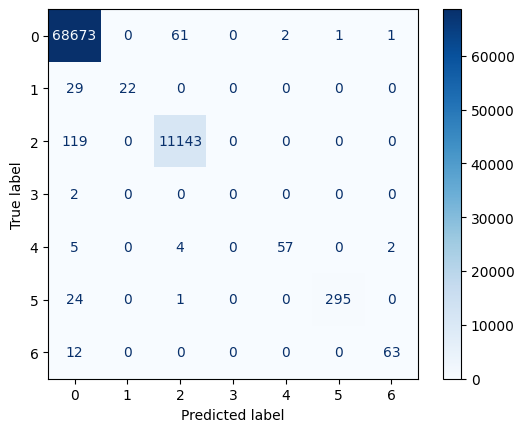

In [36]:
# Global configuration
from tensorflow.keras.optimizers import Adam, SGD

NUMOFCLIENTS = 10 # number of clients (particles)
EPOCHS = 20  # number of total iterations
CLIENT_EPOCHS = 5  # number of each client's iterations
BATCH_SIZE = 256 # Size of batches to train on
ACC = 0.3
LOCAL_ACC = 0.7
GLOBAL_ACC = 1.4
DROP_RATE = 0
SELECT_CLIENTS = 1
# Model configuration
# LOSS = 'binary_crossentropy'
LOSS = 'sparse_categorical_crossentropy'
NUMOFCLASSES = 7
lr = 0.00001
# lr = 0.0001
OPTIMIZER = Adam(learning_rate=lr)
# OPTIMIZER = SGD(learning_rate=lr, momentum=0.9, nesterov=False)

# Function to write results to CSV
def write_csv(algorithm_name, list):
    file_name = '{name}_10Clients_{drop}%_output_LR_{lr}_CLI_{cli}_CLI_EPOCHS_{cli_epoch}_TOTAL_EPOCHS_{epochs}_BATCH_{batch}.csv'
    file_name = file_name.format(drop=DROP_RATE, name=algorithm_name, lr=lr, cli=NUMOFCLIENTS, cli_epoch=CLIENT_EPOCHS, epochs=EPOCHS, batch=BATCH_SIZE)
    f = open(file_name, 'w', encoding='utf-8', newline='')
    wr = csv.writer(f)

    for l in list:
        wr.writerow(l)
    f.close()

def init_model(train_data_shape):
    model = CustomModel(loss=LOSS, optimizer=OPTIMIZER,num_classes=NUMOFCLASSES)
    init_model = model.fl_paper_model(train_shape=train_data_shape)

    return init_model

import numpy as np

def client_data_config(x_train, y_train):
    num_clients = NUMOFCLIENTS
    num_samples = x_train.shape[0]
    num_per_client = num_samples // num_clients

    # Generate a random permutation of indices
    indices = np.random.permutation(num_samples)

    # Split indices into chunks for each client
    client_indices = np.array_split(indices, num_clients)

    # Prepare client data
    client_data = []
    data_distributions = []

    for i, idxs in enumerate(client_indices):
        new_x_train = x_train[idxs]
        new_y_train = y_train[idxs]

        client_data.append((new_x_train, new_y_train))

        # Record the data distribution for the client
        class_counts = np.bincount(new_y_train)
        class_distribution = {cls: count for cls, count in enumerate(class_counts) if count > 0}

        data_distribution = {
            'client_index': i,
            'num_samples': len(idxs),
            'classes_distribution': class_distribution
        }
        data_distributions.append(data_distribution)

    # Print the data distribution for each client
    for dist in data_distributions:
        print(f"Client {dist['client_index']}:")
        print(f"  Number of samples: {dist['num_samples']}")
        print(f"  Class distribution: {dist['classes_distribution']}")
        print()

    return client_data

def fedAVG(server_weight):
    avg_weight = [np.zeros_like(w) for w in server_weight[0]]  # Initialize with the same structure as the first set of weights

    for client_weights in server_weight:
        for i, w in enumerate(client_weights):
            avg_weight[i] += w

    avg_weight = [w / len(server_weight) for w in avg_weight]  # Compute the average

    return avg_weight

def client_update(index, client, now_epoch, avg_weight):
    print("client {}/{} fitting".format(index + 1, int(NUMOFCLIENTS * SELECT_CLIENTS)))

    optimizer = tf.keras.optimizers.Adam()
    client.compile(optimizer=optimizer, loss=LOSS, metrics=['accuracy'])
    if now_epoch != 0:
        client.set_weights(avg_weight)

    client.fit(client_data[index][0], client_data[index][1],
        epochs=CLIENT_EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_split=0.2,
    )

    return client

if __name__ == "__main__":

    x_train = X_train_images
    y_train = Y_train
    x_test = X_test_images
    y_test = Y_test_test

    train_data_shape = (x_train[0].shape[1],)
    print("Shape of a single data point:", train_data_shape)
    client_data = client_data_config(x_train, y_train)

    server_model = init_model(train_data_shape=train_data_shape)
    print(server_model.summary())

    fl_model = []
    for i in range(NUMOFCLIENTS):  # Keys are now starting from 0
        optimizer = Adam(learning_rate=lr)
        fl_model.append(init_model(train_data_shape=train_data_shape,))

    avg_weight = [np.zeros_like(w) for w in server_model.get_weights()]

    server_evaluate_acc = []

    for epoch in range(EPOCHS):
        server_weight = []

        selected_num = int(max(NUMOFCLIENTS * SELECT_CLIENTS, 1))
        split_data_index = []
        while len(split_data_index) < selected_num:
            item = random.choice(range(len(fl_model)))
            if item not in split_data_index:
                split_data_index.append(item)
        split_data_index.sort()
        selected_model = [fl_model[k] for k in split_data_index]

        for index, client in enumerate(selected_model):
            recv_model = client_update(index, client, epoch, avg_weight)

            rand = random.randint(0, 99)
            drop_communication = range(DROP_RATE)
            if rand not in drop_communication:
                server_weight.append(copy.deepcopy(recv_model.get_weights()))

        avg_weight = fedAVG(server_weight)

        server_model.set_weights(avg_weight)
        print("server {}/{} evaluate".format(epoch + 1, EPOCHS))
        server_evaluate_acc.append(server_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1))

    write_csv("FedAvg_iid_CICIDS", server_evaluate_acc)

# Predict on the test set
# 
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(server_model.predict(x_test), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(NUMOFCLASSES))

# Print the confusion matrix
print("Confusion Matrix FedAvg_iid_CICIDS:")
print(cm)

# Optionally visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(NUMOFCLASSES)])
disp.plot(cmap=plt.cm.Blues)
plt.show()

'''Confusion Matrix:
[[68673,     0,    61,     0  ,   2  ,   1     ,1],
 [   29,    22,     0,     0 ,    0 ,    0     ,0],
 [  119,     0, 11143,     0 ,    0,    0     ,0],
 [    2,     0 ,    0,     0 ,    0,     0   ,  0],
 [    5,     0 ,    4,     0 ,   57 ,    0  ,   2],
 [   24,     0  ,   1,     0,     0  , 295 ,    0],
 [   12 ,    0 ,    0,     0 ,    0   ,  0,    63]]'''


FedAvg Non-IID DataFrame Head:
    0.596279501914978  0.8937575221061707
0            0.720915            0.896615
1            0.913853            0.897123
2            1.105663            0.897155
3            1.267190            0.897536
4            1.332031            0.896964
5            1.410229            0.897377
6            1.429839            0.897155
7            1.489900            0.897250
8            1.458774            0.897155
9            1.488367            0.897250
10           1.506685            0.896996
11           1.538555            0.896742
12           1.520202            0.897123
13           1.537134            0.897346
14           1.612563            0.897536
15           1.590202            0.897346
16           1.591890            0.897377
17           1.632032            0.897409
18           1.608628            0.897600
19           1.620095            0.897536
20           1.601175            0.897504
21           1.641134            0.897536
22 

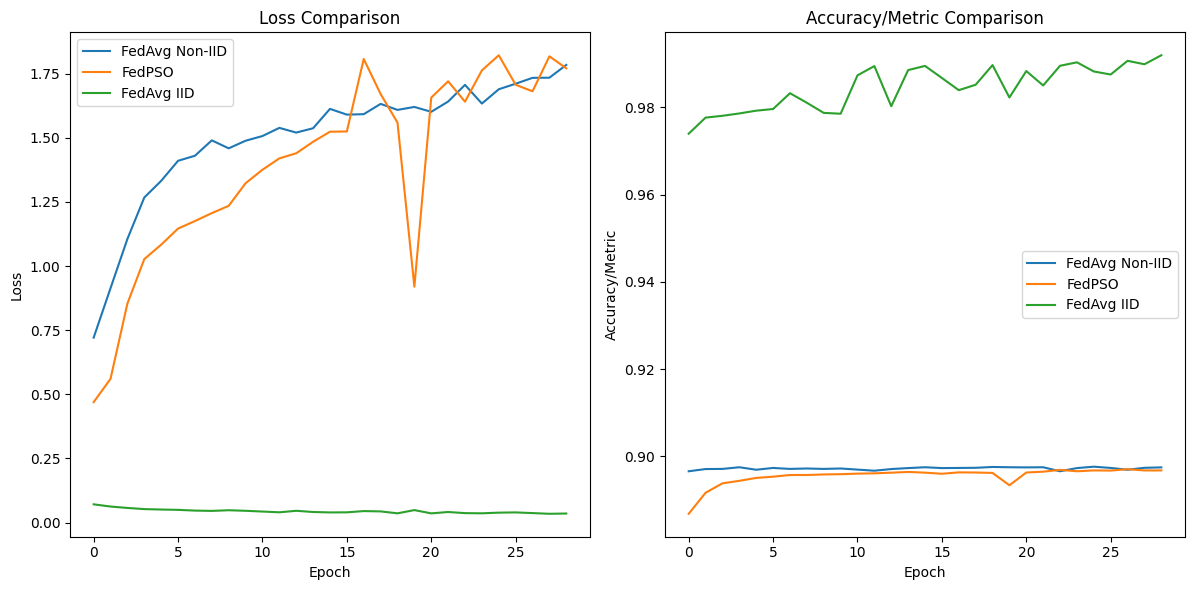

T-statistic for Loss between FedAvg Non-IID and FedPSO: 1.3544062124663416
P-value for Loss between FedAvg Non-IID and FedPSO: 0.18104671790575358
There is no significant difference between FedAvg Non-IID and FedPSO losses.
T-statistic for Loss between FedAvg Non-IID and FedAvg IID: 32.45701914015734
P-value for Loss between FedAvg Non-IID and FedAvg IID: 5.283436479466679e-38
There is a significant difference between FedAvg Non-IID and FedAvg IID losses.
T-statistic for Loss between FedPSO and FedAvg IID: 19.57508625845372
P-value for Loss between FedPSO and FedAvg IID: 1.0223546407658096e-26
There is a significant difference between FedPSO and FedAvg IID losses.
T-statistic for Accuracy/Metric between FedAvg Non-IID and FedPSO: 4.45131229553041
P-value for Accuracy/Metric between FedAvg Non-IID and FedPSO: 4.115595948518925e-05
There is a significant difference between FedAvg Non-IID and FedPSO accuracies/metrics.
T-statistic for Accuracy/Metric between FedAvg Non-IID and FedAvg IID:

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the CSV files
fedavg_noniid_df = pd.read_csv('FedAvg_Custom_Function_NSLKDD_10Clients_0%_output_LR_0.0001_CLI_10_CLI_EPOCHS_5_TOTAL_EPOCHS_30_BATCH_256.csv')
fedpso_df = pd.read_csv('FedPso_Custom_Function_NSLKDD_10Clients_0%_output_LR_0.0001_CLI_10_CLI_EPOCHS_5_TOTAL_EPOCHS_30_BATCH_256.csv')
fedavg_iid_df = pd.read_csv('FedAvg_iid_NSLKDD_FedAvg_10Clients_0%_output_LR_1e-05_CLI_10_CLI_EPOCHS_5_TOTAL_EPOCHS_30_BATCH_256.csv')

# Display the first few rows to verify structure
print("FedAvg Non-IID DataFrame Head:")
print(fedavg_noniid_df.head(30))

print("\nFedPSO DataFrame Head:")
print(fedpso_df.head(30))

print("\nFedAvg IID DataFrame Head:")
print(fedavg_iid_df.head(30))

# Extract loss and accuracy/metric by column index
fedavg_noniid_loss = fedavg_noniid_df.iloc[:, 0]  # Assuming the first column is loss
fedavg_noniid_accuracy = fedavg_noniid_df.iloc[:, 1]  # Assuming the second column is accuracy

fedpso_loss = fedpso_df.iloc[:, 0]  # Assuming the first column is loss
fedpso_accuracy = fedpso_df.iloc[:, 1]  # Assuming the second column is accuracy

fedavg_iid_loss = fedavg_iid_df.iloc[:, 0]  # Assuming the first column is loss
fedavg_iid_accuracy = fedavg_iid_df.iloc[:, 1]  # Assuming the second column is accuracy

# Plotting Loss Comparison
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(fedavg_noniid_loss, label='FedAvg Non-IID')
plt.plot(fedpso_loss, label='FedPSO')
plt.plot(fedavg_iid_loss, label='FedAvg IID')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy/Metric Comparison
plt.subplot(1, 3, 2)
plt.plot(fedavg_noniid_accuracy, label='FedAvg Non-IID')
plt.plot(fedpso_accuracy, label='FedPSO')
plt.plot(fedavg_iid_accuracy, label='FedAvg IID')
plt.title('Accuracy/Metric Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Metric')
plt.legend()

plt.tight_layout()
plt.show()

# Statistical Comparison of Final Losses
t_stat_loss_noniid_vs_pso, p_val_loss_noniid_vs_pso = ttest_ind(fedavg_noniid_loss, fedpso_loss)
t_stat_loss_noniid_vs_iid, p_val_loss_noniid_vs_iid = ttest_ind(fedavg_noniid_loss, fedavg_iid_loss)
t_stat_loss_pso_vs_iid, p_val_loss_pso_vs_iid = ttest_ind(fedpso_loss, fedavg_iid_loss)

print(f"T-statistic for Loss between FedAvg Non-IID and FedPSO: {t_stat_loss_noniid_vs_pso}")
print(f"P-value for Loss between FedAvg Non-IID and FedPSO: {p_val_loss_noniid_vs_pso}")

if p_val_loss_noniid_vs_pso < 0.05:
    print("There is a significant difference between FedAvg Non-IID and FedPSO losses.")
else:
    print("There is no significant difference between FedAvg Non-IID and FedPSO losses.")

print(f"T-statistic for Loss between FedAvg Non-IID and FedAvg IID: {t_stat_loss_noniid_vs_iid}")
print(f"P-value for Loss between FedAvg Non-IID and FedAvg IID: {p_val_loss_noniid_vs_iid}")

if p_val_loss_noniid_vs_iid < 0.05:
    print("There is a significant difference between FedAvg Non-IID and FedAvg IID losses.")
else:
    print("There is no significant difference between FedAvg Non-IID and FedAvg IID losses.")

print(f"T-statistic for Loss between FedPSO and FedAvg IID: {t_stat_loss_pso_vs_iid}")
print(f"P-value for Loss between FedPSO and FedAvg IID: {p_val_loss_pso_vs_iid}")

if p_val_loss_pso_vs_iid < 0.05:
    print("There is a significant difference between FedPSO and FedAvg IID losses.")
else:
    print("There is no significant difference between FedPSO and FedAvg IID losses.")

# Statistical Comparison of Final Accuracies/Metrics
t_stat_acc_noniid_vs_pso, p_val_acc_noniid_vs_pso = ttest_ind(fedavg_noniid_accuracy, fedpso_accuracy)
t_stat_acc_noniid_vs_iid, p_val_acc_noniid_vs_iid = ttest_ind(fedavg_noniid_accuracy, fedavg_iid_accuracy)
t_stat_acc_pso_vs_iid, p_val_acc_pso_vs_iid = ttest_ind(fedpso_accuracy, fedavg_iid_accuracy)

print(f"T-statistic for Accuracy/Metric between FedAvg Non-IID and FedPSO: {t_stat_acc_noniid_vs_pso}")
print(f"P-value for Accuracy/Metric between FedAvg Non-IID and FedPSO: {p_val_acc_noniid_vs_pso}")

if p_val_acc_noniid_vs_pso < 0.05:
    print("There is a significant difference between FedAvg Non-IID and FedPSO accuracies/metrics.")
else:
    print("There is no significant difference between FedAvg Non-IID and FedPSO accuracies/metrics.")

print(f"T-statistic for Accuracy/Metric between FedAvg Non-IID and FedAvg IID: {t_stat_acc_noniid_vs_iid}")
print(f"P-value for Accuracy/Metric between FedAvg Non-IID and FedAvg IID: {p_val_acc_noniid_vs_iid}")

if p_val_acc_noniid_vs_iid < 0.05:
    print("There is a significant difference between FedAvg Non-IID and FedAvg IID accuracies/metrics.")
else:
    print("There is no significant difference between FedAvg Non-IID and FedAvg IID accuracies/metrics.")

print(f"T-statistic for Accuracy/Metric between FedPSO and FedAvg IID: {t_stat_acc_pso_vs_iid}")
print(f"P-value for Accuracy/Metric between FedPSO and FedAvg IID: {p_val_acc_pso_vs_iid}")

if p_val_acc_pso_vs_iid < 0.05:
    print("There is a significant difference between FedPSO and FedAvg IID accuracies/metrics.")
else:
    print("There is no significant difference between FedPSO and FedAvg IID accuracies/metrics.")


FedPSO TORA DataFrame Head:
    1.027215600013733  0.7996624112129211
0            0.449044            0.941912
1            0.255616            0.964730
2            0.164742            0.973835
3            0.116137            0.979122
4            0.087364            0.982995
5            0.070144            0.985818
6            0.059487            0.988136
7            0.068268            0.986798
8            0.062872            0.988108
9            0.060759            0.988654
10           0.060118            0.988948
11           0.060136            0.989081
12           0.060469            0.989355
13           0.061138            0.989537
14           0.061821            0.989642
15           0.062592            0.989775
16           0.063595            0.989887
17           0.064492            0.989992
18           0.065299            0.990132
19           0.065996            0.990251
20           0.066766            0.990314
21           0.067423            0.990545
22    

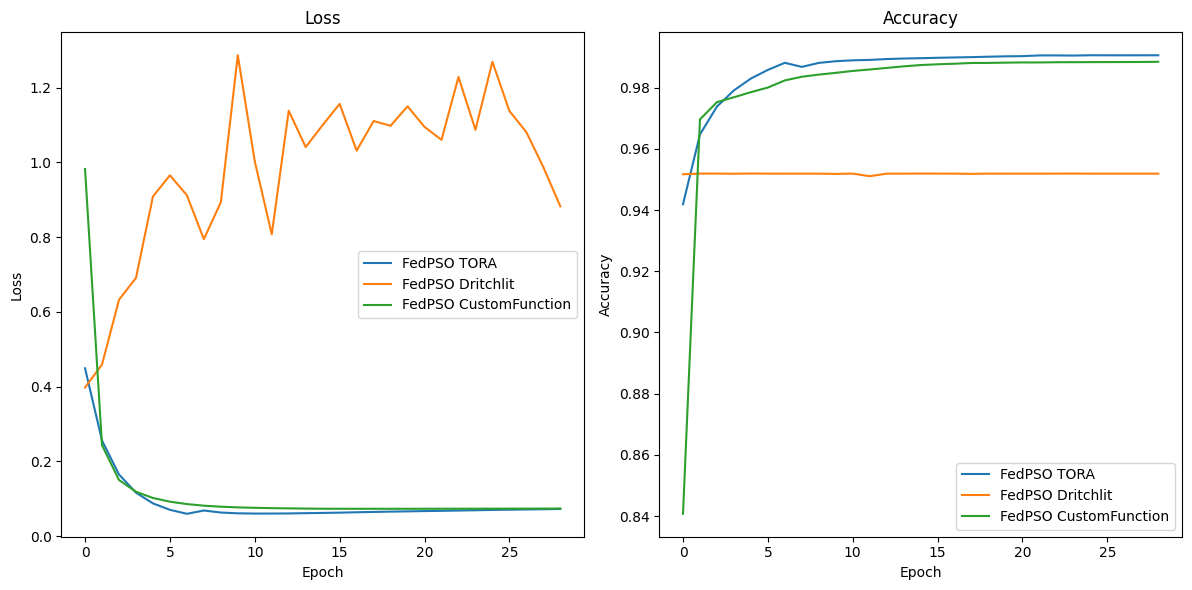

T-statistic for Loss between FedPSO TORA and FedPSO Dritchlit: -20.484452377906766
P-value for Loss between FedPSO TORA and FedPSO Dritchlit: 1.0921492160809953e-27
There is a significant difference between FedPSO TORA and FedPSO Dritchlit losses.
T-statistic for Loss between FedPSO TORA and FedPSO CustomFunction: -0.749272357675293
P-value for Loss between FedPSO TORA and FedPSO CustomFunction: 0.4568290678534419
There is no significant difference between FedPSO TORA and FedPSO CustomFunction losses.
T-statistic for Loss between FedPSO Dritchlit and FedPSO CustomFunction: 16.724289488453834
P-value for Loss between FedPSO Dritchlit and FedPSO CustomFunction: 1.9346814300995514e-23
There is a significant difference between FedPSO Dritchlit and FedPSO CustomFunction losses.
T-statistic for Accuracy/Metric between FedPSO TORA and FedPSO Dritchlit: 17.89408212853953
P-value for Accuracy/Metric between FedPSO TORA and FedPSO Dritchlit: 7.8923007594293785e-25
There is a significant differen

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# بارگذاری داده‌ها از فایل‌های CSV
fedpso_tora = pd.read_csv('FedPSO_TORA_CICIDS_10Clients_0%_output_LR_1e-05_CLI_10_CLI_EPOCHS_5_TOTAL_EPOCHS_30_BATCH_256.csv')
fedpso_dritchlit = pd.read_csv('FedPSO_Dritchlit_CICIDS_10Clients_0%_output_LR_0.0002_CLI_10_CLI_EPOCHS_5_TOTAL_EPOCHS_30_BATCH_256.csv')
fedpso_customfunction = pd.read_csv('CustomFunction_CICIDS_FedPso_10Clients_0%_output_LR_1e-05_CLI_10_CLI_EPOCHS_5_TOTAL_EPOCHS_30_BATCH_256.csv')

# نمایش اولین چند ردیف برای بررسی ساختار
print("FedPSO TORA DataFrame Head:")
print(fedpso_tora.head(30))

print("\nFedPSO Dritchlit DataFrame Head:")
print(fedpso_dritchlit.head(30))

print("\nFedPSO CustomFunction DataFrame Head:")
print(fedpso_customfunction.head(30))

# استخراج مقادیر خطا و دقت از ستون‌های داده‌ها
fedpso_tora_loss = fedpso_tora.iloc[:, 0]  # فرض بر این است که ستون اول خطا است
fedpso_tora_accuracy = fedpso_tora.iloc[:, 1]  # فرض بر این است که ستون دوم دقت است

fedpso_dritchlit_loss = fedpso_dritchlit.iloc[:, 0]  # فرض بر این است که ستون اول خطا است
fedpso_dritchlit_accuracy = fedpso_dritchlit.iloc[:, 1]  # فرض بر این است که ستون دوم دقت است

fedpso_customfunction_loss = fedpso_customfunction.iloc[:, 0]  # فرض بر این است که ستون اول خطا است
fedpso_customfunction_accuracy = fedpso_customfunction.iloc[:, 1]  # فرض بر این است که ستون دوم دقت است

# رسم نمودار مقایسه خطا
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(fedpso_tora_loss, label='FedPSO TORA')
plt.plot(fedpso_dritchlit_loss, label='FedPSO Dritchlit')
plt.plot(fedpso_customfunction_loss, label='FedPSO CustomFunction')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# رسم نمودار مقایسه دقت
plt.subplot(1, 3, 2)
plt.plot(fedpso_tora_accuracy, label='FedPSO TORA')
plt.plot(fedpso_dritchlit_accuracy, label='FedPSO Dritchlit')
plt.plot(fedpso_customfunction_accuracy, label='FedPSO CustomFunction')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# مقایسه آماری خطاهای نهایی
t_stat_loss_tora_vs_dritchlit, p_val_loss_tora_vs_dritchlit = ttest_ind(fedpso_tora_loss, fedpso_dritchlit_loss)
t_stat_loss_tora_vs_customfunction, p_val_loss_tora_vs_customfunction = ttest_ind(fedpso_tora_loss, fedpso_customfunction_loss)
t_stat_loss_dritchlit_vs_customfunction, p_val_loss_dritchlit_vs_customfunction = ttest_ind(fedpso_dritchlit_loss, fedpso_customfunction_loss)

print(f"T-statistic for Loss between FedPSO TORA and FedPSO Dritchlit: {t_stat_loss_tora_vs_dritchlit}")
print(f"P-value for Loss between FedPSO TORA and FedPSO Dritchlit: {p_val_loss_tora_vs_dritchlit}")

if p_val_loss_tora_vs_dritchlit < 0.05:
    print("There is a significant difference between FedPSO TORA and FedPSO Dritchlit losses.")
else:
    print("There is no significant difference between FedPSO TORA and FedPSO Dritchlit losses.")

print(f"T-statistic for Loss between FedPSO TORA and FedPSO CustomFunction: {t_stat_loss_tora_vs_customfunction}")
print(f"P-value for Loss between FedPSO TORA and FedPSO CustomFunction: {p_val_loss_tora_vs_customfunction}")

if p_val_loss_tora_vs_customfunction < 0.05:
    print("There is a significant difference between FedPSO TORA and FedPSO CustomFunction losses.")
else:
    print("There is no significant difference between FedPSO TORA and FedPSO CustomFunction losses.")

print(f"T-statistic for Loss between FedPSO Dritchlit and FedPSO CustomFunction: {t_stat_loss_dritchlit_vs_customfunction}")
print(f"P-value for Loss between FedPSO Dritchlit and FedPSO CustomFunction: {p_val_loss_dritchlit_vs_customfunction}")

if p_val_loss_dritchlit_vs_customfunction < 0.05:
    print("There is a significant difference between FedPSO Dritchlit and FedPSO CustomFunction losses.")
else:
    print("There is no significant difference between FedPSO Dritchlit and FedPSO CustomFunction losses.")

# مقایسه آماری دقت‌های نهایی
t_stat_acc_tora_vs_dritchlit, p_val_acc_tora_vs_dritchlit = ttest_ind(fedpso_tora_accuracy, fedpso_dritchlit_accuracy)
t_stat_acc_tora_vs_customfunction, p_val_acc_tora_vs_customfunction = ttest_ind(fedpso_tora_accuracy, fedpso_customfunction_accuracy)
t_stat_acc_dritchlit_vs_customfunction, p_val_acc_dritchlit_vs_customfunction = ttest_ind(fedpso_dritchlit_accuracy, fedpso_customfunction_accuracy)

print(f"T-statistic for Accuracy/Metric between FedPSO TORA and FedPSO Dritchlit: {t_stat_acc_tora_vs_dritchlit}")
print(f"P-value for Accuracy/Metric between FedPSO TORA and FedPSO Dritchlit: {p_val_acc_tora_vs_dritchlit}")

if p_val_acc_tora_vs_dritchlit < 0.05:
    print("There is a significant difference between FedPSO TORA and FedPSO Dritchlit accuracies/metrics.")
else:
    print("There is no significant difference between FedPSO TORA and FedPSO Dritchlit accuracies/metrics.")

print(f"T-statistic for Accuracy/Metric between FedPSO TORA and FedPSO CustomFunction: {t_stat_acc_tora_vs_customfunction}")
print(f"P-value for Accuracy/Metric between FedPSO TORA and FedPSO CustomFunction: {p_val_acc_tora_vs_customfunction}")

if p_val_acc_tora_vs_customfunction < 0.05:
    print("There is a significant difference between FedPSO TORA and FedPSO CustomFunction accuracies/metrics.")
else:
    print("There is no significant difference between FedPSO TORA and FedPSO CustomFunction accuracies/metrics.")

print(f"T-statistic for Accuracy/Metric between FedPSO Dritchlit and FedPSO CustomFunction: {t_stat_acc_dritchlit_vs_customfunction}")
print(f"P-value for Accuracy/Metric between FedPSO Dritchlit and FedPSO CustomFunction: {p_val_acc_dritchlit_vs_customfunction}")

if p_val_acc_dritchlit_vs_customfunction < 0.05:
    print("There is a significant difference between FedPSO Dritchlit and FedPSO CustomFunction accuracies/metrics.")
else:
    print("There is no significant difference between FedPSO Dritchlit and FedPSO CustomFunction accuracies/metrics.")
